# Capítulo 14. Regresión logítica


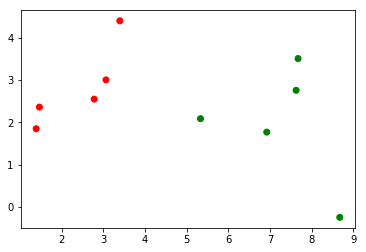

In [1]:
%matplotlib inline

from numpy import array
from matplotlib import pyplot

#              X1           X2            Y
data = array([[2.7810836,   2.550537003,  0],
              [1.465489372, 2.362125076,  0],
              [3.396561688, 4.400293529,  0],
              [1.38807019,  1.850220317,  0],
              [3.06407232,  3.005305973,  0],
              [7.627531214, 2.759262235,  1],
              [5.332441248, 2.088626775,  1],
              [6.922596716, 1.77106367,   1],
              [8.675418651, -0.242068655, 1],
              [7.673756466, 3.508563011,  1]])

pyplot.scatter(data[:,0], data[:,1], color=['red' if y == 0 else 'green' for y in data[:,2]])
pyplot.show()

In [2]:
from numpy import sqrt, zeros

class LogisticRegression:
    
    def __init__(self, X):
        "Class to calculate the simple linear regression y = B0 + B1 * x"
        self.x = x
        self.y = y
        
        self.b0 = 0.
        self.b1 = 0.
        
        self.rmse = 0. # Root Mean Squared Error
        
    def fit(self, alpha, epochs):
        '''Fit by Stochastic Gradient Descent'''    
        
        self.error = zeros(epochs)
        
        for i in range(epochs):
            self.b0, self.b1 = self._epoch(self.b0, self.b1, alpha)
            self.predicted_y = self.predict(self.x)
            self.error[i] = self._calculate_rmse()
        
        self.rmse = self.error[-1]
            
    def _epoch(self, b0, b1, alpha):
        for i in range(self.y.size):
            prediction = b0 + b1 * self.x[i]
            error = prediction - self.y[i]
            b0 = b0 - alpha * error
            b1 = b1 - alpha * error * self.x[i]
            
        return (b0, b1)
    
    def _calculate_rmse(self):
        "Calculate the Root Mean Squared Error or RMSE"
        error = self.predicted_y - self.y  # Calculate the error from predicted y
        squared_error = error ** 2         # Calculate the squared error
        n = y.size                         # n = size of the dataset
        
        return sqrt(sum(squared_error) / n)
    
    def predict(self, x):
        return x * self.b1 + self.b0